# Aufbau eines el. Netzes inkl. der Simulation

In [14]:
import pandapower as pp
import pandapower.plotting as plot
import numpy as np
import pandas as pd
import pv_battery_model
import matplotlib.pyplot as plt

In [15]:
# Erstellung eines leeren Netzes
net = pp.create_empty_network()

In [16]:
# create bus
mv_bus = pp.create_bus(net, vn_kv=20, name="MV Bus")  # Mittelspannungsseite
lv_bus = pp.create_bus(net, vn_kv=0.4, name="LV Bus")  # Niederspannungsseite

v1_1 = pp.create_bus(net, vn_kv=0.4, name="v1.1")
v1_2 = pp.create_bus(net, vn_kv=0.4, name="v1.2")
v1_2_1_1 = pp.create_bus(net, vn_kv=0.4, name="v1.2.1.1")
v1_2_1_2 = pp.create_bus(net, vn_kv=0.4, name="v1.2.1.2")
v1_2_2_1 = pp.create_bus(net, vn_kv=0.4, name="v1.2.2.1")
v1_2_2_2 = pp.create_bus(net, vn_kv=0.4, name="v1.2.2.2")
v2_1 = pp.create_bus(net, vn_kv=0.4, name="v2.1")
v2_2 = pp.create_bus(net, vn_kv=0.4, name="v2.2")
v2_2_1_1 = pp.create_bus(net, vn_kv=0.4, name="v2.2.1.1")
v2_2_1_2 = pp.create_bus(net, vn_kv=0.4, name="v2.2.1.2")
v2_2_2_1 = pp.create_bus(net, vn_kv=0.4, name="v2.2.2.1")
v2_2_2_2 = pp.create_bus(net, vn_kv=0.4, name="v2.2.2.2")

In [17]:
# external grid
pp.create_ext_grid(net, mv_bus, vm_pu=1.02, name="external grid")

0

In [18]:
# create transformer
pp.create_transformer(net, mv_bus, lv_bus, std_type="0.4 MVA 20/0.4 kV")
#print(pp.available_std_types(net, "trafo"))     # zeigt mir verschiedene verfügbare Trafos

0

In [19]:
# create line
pp.create_line(net, lv_bus, v1_1, std_type="NAYY 4x50 SE", length_km=0.05, name="line1.1")
pp.create_line(net, v1_1, v1_2, std_type="NAYY 4x50 SE", length_km=0.05, name="line1.2")
pp.create_line(net, v1_2, v1_2_1_1, std_type="NAYY 4x50 SE", length_km=0.05, name="line1.2.1.1")
pp.create_line(net, v1_2_1_1, v1_2_1_2, std_type="NAYY 4x50 SE", length_km=0.05, name="line1.2.1.2")
pp.create_line(net, v1_2, v1_2_2_1, std_type="NAYY 4x50 SE", length_km=0.05, name="line1.2.2.1")
pp.create_line(net, v1_2_2_1, v1_2_2_2, std_type="NAYY 4x50 SE", length_km=0.05, name="line1.2.2.2")
pp.create_line(net, lv_bus, v2_1, std_type="NAYY 4x50 SE", length_km=0.05, name="line2_1")
pp.create_line(net, v2_1, v2_2, std_type="NAYY 4x50 SE", length_km=0.05, name="line2.2")
pp.create_line(net, v2_2, v2_2_1_1, std_type="NAYY 4x50 SE", length_km=0.05, name="line2.2.1.1")
pp.create_line(net, v2_2_1_1, v2_2_1_2, std_type="NAYY 4x50 SE", length_km=0.05, name="line2.2.1.2")
pp.create_line(net, v2_2, v2_2_2_1, std_type="NAYY 4x50 SE", length_km=0.05, name="line2.2.2.1")
pp.create_line(net, v2_2_2_1, v2_2_2_2, std_type="NAYY 4x50 SE", length_km=0.05, name="line2.2.2.2")
#print(pp.available_std_types(net))                # zeigt mir verschiedene verfügbare Kabeltypen

11

In [20]:
# Variablenzuweisung für Lasten und Erzeuger
l_1_1 = pp.create_load(net, v1_1, p_mw=0.1, q_mvar=0.01, name="L1.1")
l_1_2 = pp.create_load(net, v1_2, p_mw=0.0, q_mvar=0.01, name="L1.2")
l_1_2_1_1 = pp.create_load(net, v1_2_1_1, p_mw=0.0, q_mvar=0.01, name="L1.2.1.1")
l_1_2_1_2 = pp.create_load(net, v1_2_1_2, p_mw=0.0, q_mvar=0.01, name="L1.2.1.2")
l_1_2_2_1 = pp.create_load(net, v1_2_2_1, p_mw=0.0, q_mvar=0.01, name="L1.2.2.1")
l_1_2_2_2 = pp.create_load(net, v1_2_2_2, p_mw=0.0, q_mvar=0.01, name="L1.2.2.2")
l_2_1 = pp.create_load(net, v2_1, p_mw=0.0, q_mvar=0.01, name="L2.1")
l_2_2 = pp.create_load(net, v2_2, p_mw=0.1, q_mvar=0.01, name="L2.2")
l_2_2_1_1 = pp.create_load(net, v2_2_1_1, p_mw=0.0, q_mvar=0.01, name="L2.2.1.1")
l_2_2_1_2 = pp.create_load(net, v2_2_1_2, p_mw=0.0, q_mvar=0.01, name="L2.2.1.2")
l_2_2_2_1 = pp.create_load(net, v2_2_2_1, p_mw=0.1, q_mvar=0.01, name="L2.2.2.1")
l_2_2_2_2 = pp.create_load(net, v2_2_2_2, p_mw=0.0, q_mvar=0.01, name="L2.2.2.2")

In [21]:
# Variablenzuweisung für Erzeuger
e_1_1 = pp.create_sgen(net, v1_1, p_mw=0.02, q_mvar=0.005, name="E1.1")
e_1_2 = pp.create_sgen(net, v1_2, p_mw=0.03, q_mvar=0.005, name="E1.2")
e_1_2_1_1 = pp.create_sgen(net, v1_2_1_1, p_mw=0.04, q_mvar=0.005, name="E1.2.1.1")
e_1_2_1_2 = pp.create_sgen(net, v1_2_1_2, p_mw=0.05, q_mvar=0.005, name="E1.2.1.2")
e_1_2_2_1 = pp.create_sgen(net, v1_2_2_1, p_mw=0.06, q_mvar=0.005, name="E1.2.2.1")
e_1_2_2_2 = pp.create_sgen(net, v1_2_2_2, p_mw=0.07, q_mvar=0.005, name="E1.2.2.2")
e_2_1 = pp.create_sgen(net, v2_1, p_mw=0.08, q_mvar=0.005, name="E2.1")
e_2_2 = pp.create_sgen(net, v2_2, p_mw=0.09, q_mvar=0.005, name="E2.2")
e_2_2_1_1 = pp.create_sgen(net, v2_2_1_1, p_mw=0.1, q_mvar=0.005, name="E2.2.1.1")
e_2_2_1_2 = pp.create_sgen(net, v2_2_1_2, p_mw=0.11, q_mvar=0.005, name="E2.2.1.2")
e_2_2_2_1 = pp.create_sgen(net, v2_2_2_1, p_mw=0.12, q_mvar=0.005, name="E2.2.2.1")
e_2_2_2_2 = pp.create_sgen(net, v2_2_2_2, p_mw=0.13, q_mvar=0.005, name="E2.2.2.2")


In [22]:
# PV Daten einlesen
filename_pv = "C:/Users/flori/EMS/EMS_Projekt/Flo/files/pv_1kWp.csv" 
pv_1_data = pv_battery_model.pv(50, filename_pv) / 1000
pv_2_data = pv_battery_model.pv(50, filename_pv) / 1000
pv_3_data = pv_battery_model.pv(20, filename_pv) / 1000

In [23]:

# Ergebnisse speichern
results = []

# Simulation über alle Zeitschritte
for t in range(2000):

    # PV-Leistungen für diesen Zeitschritt setzen
    # PV-Daten zuweisen
    net.sgen.at[e_1_1, "p_mw"] = pv_1_data[t]
    net.sgen.at[e_1_2, "p_mw"] = pv_1_data[t]
    net.sgen.at[e_1_2_1_1, "p_mw"] = pv_1_data[t]
    net.sgen.at[e_1_2_1_2, "p_mw"] = pv_1_data[t]
    net.sgen.at[e_1_2_2_1, "p_mw"] = pv_1_data[t]
    net.sgen.at[e_1_2_2_2, "p_mw"] = pv_1_data[t]
    net.sgen.at[e_2_1, "p_mw"] = pv_2_data[t]
    net.sgen.at[e_2_2, "p_mw"] = pv_2_data[t]
    net.sgen.at[e_2_2_1_1, "p_mw"] = pv_3_data[t]
    net.sgen.at[e_2_2_1_2, "p_mw"] = pv_3_data[t]
    net.sgen.at[e_2_2_2_1, "p_mw"] = pv_3_data[t]
    net.sgen.at[e_2_2_2_2, "p_mw"] = pv_3_data[t]

    
    if(t < 1000):
        net.load.at[l_1_1, "p_mw"] =  0.2
    elif(t < 2000):
        net.load.at[l_1_1, "p_mw"] =  0.1
    elif(t < 3000):
        net.load.at[l_1_1, "p_mw"] =  0.05
    elif(t < 4000):
        net.load.at[l_1_1, "p_mw"] =  0.3
    elif(t < 5000):
        net.load.at[l_1_1, "p_mw"] =  0.2
    elif(t < 6000):
        net.load.at[l_1_1, "p_mw"] =  0.0
    elif(t < 7000):
        net.load.at[l_1_1, "p_mw"] =  0.2    

    pp.runpp(net)

    # zum prüfen des Netzes, bei einer Fehlermeldung
    # try:
    #     pp.runpp(net)
    # except pp.pandapower.powerflow.LoadflowNotConverged:
    #     print("Lastfluss nicht konvergiert!")
    #     print("Knotenspannungen:")
    #     print(net.res_bus)
    #     print("Leitungsbelastungen:")
    #     print(net.res_line)
    
    # Ergebnisse speichern
    results.append({
        "time": t,
        "voltage_bus_lv": net.res_bus.at[lv_bus, "vm_pu"],
        "voltage_bus_v1_1": net.res_bus.at[v1_1, "vm_pu"],
        "voltage_bus_v1_2": net.res_bus.at[v1_2, "vm_pu"],
        "voltage_bus_v1_2_1_1": net.res_bus.at[v1_2_1_1, "vm_pu"],
        "voltage_bus_v1_2_1_2": net.res_bus.at[v1_2_1_2, "vm_pu"],
        "voltage_bus_v1_2_2_1": net.res_bus.at[v1_2_2_1, "vm_pu"],
        "voltage_bus_v1_2_2_2": net.res_bus.at[v1_2_2_2, "vm_pu"],
        "voltage_bus_v2_1": net.res_bus.at[v2_1, "vm_pu"],
        "voltage_bus_v2_2": net.res_bus.at[v2_2, "vm_pu"],
        "voltage_bus_v2_2_1_1": net.res_bus.at[v2_2_1_1, "vm_pu"],
        "voltage_bus_v2_2_1_2": net.res_bus.at[v2_2_1_2, "vm_pu"],
        "voltage_bus_v2_2_2_1": net.res_bus.at[v2_2_2_1, "vm_pu"],
        "voltage_bus_v2_2_2_2": net.res_bus.at[v2_2_2_2, "vm_pu"]
    })

# Ergebnisse in DataFrame umwandeln
results_df = pd.DataFrame(results)
print(results_df.head())

load_results = net.res_load.join(net.load["name"], how='left')
print(load_results)

   time  voltage_bus_lv  voltage_bus_v1_1  voltage_bus_v1_2  \
0     0        0.993199          0.950105          0.949396   
1     1        0.993199          0.950105          0.949396   
2     2        0.993199          0.950105          0.949396   
3     3        0.993199          0.950105          0.949396   
4     4        0.993199          0.950105          0.949396   

   voltage_bus_v1_2_1_1  voltage_bus_v1_2_1_2  voltage_bus_v1_2_2_1  \
0              0.949119              0.948982              0.949119   
1              0.949119              0.948982              0.949119   
2              0.949119              0.948982              0.949119   
3              0.949119              0.948982              0.949119   
4              0.949119              0.948982              0.949119   

   voltage_bus_v1_2_2_2  voltage_bus_v2_1  voltage_bus_v2_2  \
0              0.948982          0.947224          0.901387   
1              0.948982          0.947224          0.901387   
2    

In [24]:
# Ergebnisse speichern in eine CSV Datei
results_df.to_csv("C:/Users/flori/EMS/EMS_Projekt/Flo/files/typical_pv_results.csv", index=False)


No or insufficient geodata available --> Creating artificial coordinates. This may take some time


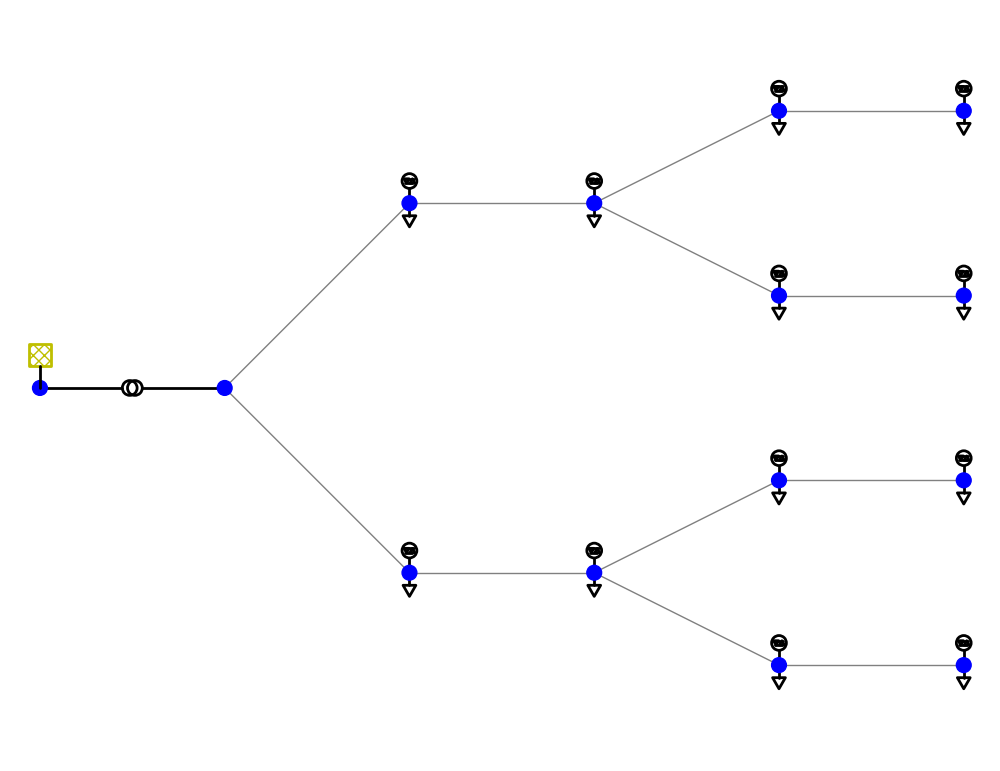

<Axes: >

In [25]:
# Plot des Netzes
plot.simple_plot(net, show_plot=True, plot_gens=True, plot_loads=True, plot_sgens=True)

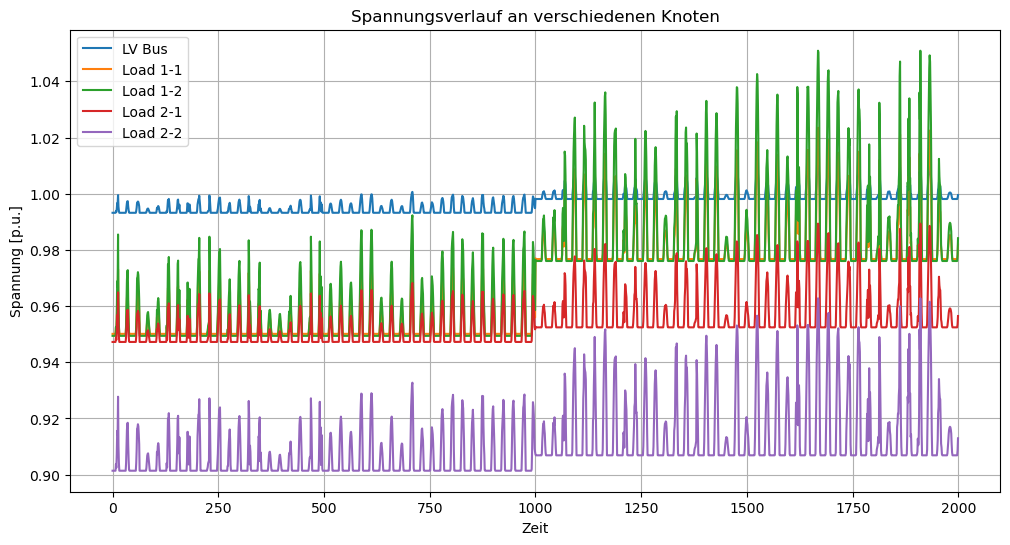

In [27]:
# Spannungen plotten
plt.figure(figsize=(12, 6))
plt.plot(results_df["time"], results_df["voltage_bus_lv"], label="LV Bus")
plt.plot(results_df["time"], results_df["voltage_bus_v1_1"], label="Load 1-1")
plt.plot(results_df["time"], results_df["voltage_bus_v1_2"], label="Load 1-2")
plt.plot(results_df["time"], results_df["voltage_bus_v2_1"], label="Load 2-1")
plt.plot(results_df["time"], results_df["voltage_bus_v2_2"], label="Load 2-2")

# Titel, Labels und Legende
plt.title("Spannungsverlauf an verschiedenen Knoten")
plt.xlabel("Zeit")
plt.ylabel("Spannung [p.u.]")
plt.legend()
plt.grid(True)
plt.show()